# 1.7 붓꽃의 품종 분류

식물학자는 앞에서 채집한 붓꽃이 어떤 품종인지 구분하려고 함<br>

In [6]:
from sklearn.datasets import load_iris

In [7]:
# 딕셔너리랑 비슷한 데이터 형태
# 키와 값으로 구성
iris_dataset =  load_iris()

In [8]:
print("iris_dataset의 키:\n",iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [9]:
#DESCR 키에는 데이터셋에 대한 간략한 설명이 들어 있다.
print(iris_dataset['DESCR'][:193]+"\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [10]:
# target_names 에서는 예측하려는 붓꽃 품종의 이름을 문자열 배열로 가지고 있다. 
print("타깃의 이름:",iris_dataset['target_names'])

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [11]:
#feature_names 각 특성을 설명하는 문자열 리스트
print("특성의 이름:",iris_dataset['feature_names'])

특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
#data는 꽃잎의 길이와 폭, 꽃받침의 길이와 폭을 수치 값으로 가지고 있는 Numpy 배열
print("data의 타입:",type(iris_dataset['data']))

data의 타입: <class 'numpy.ndarray'>


In [13]:
# 행은 개개의 꽃 열은 각 꽃에서 구한 네 개의 측정치
# 150개의 붓꽃 데이터를 가지고 있음 
# 각각의 데이터 = Sample
# 속성 =  특성
# 배열의 크기 = 샘플 수 X 특성 수
print("data의 크기:",iris_dataset['data'].shape)

data의 크기: (150, 4)


In [14]:
# 다섯 샘플의 특성 값
# 꽃잎 폭은 모두 0.2cm
print("data의 처음 다섯 행:\n",iris_dataset['data'][:5])

data의 처음 다섯 행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [15]:
#  target 도 샘플 붓꽃의 품종을 담은 Numpy 배열
print("target의 타입",type(iris_dataset['target']))

target의 타입 <class 'numpy.ndarray'>


In [16]:
# 1차원 배열
print("target의 크기",iris_dataset['target'].shape)

target의 크기 (150,)


In [17]:
# 종류는 0에서 2까지의 정수로 기록되어 있다.
# 0: setosa 1: versicolor 2:virginica
print("타깃:\n",iris_dataset['target'])

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
# 데이터를 train 과 test로 나눔 (75% , 25%)
# ramdom을 해줘야 한다. -> 안하면 뒤에 레이블은 다 2 로 종류가 똑같음
# 재사용할꺼면 번호를 지정을 해서 랜덤값이 일정하게 나옴
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

In [19]:
# train 75% = 112 개
print("X_train 크기:",X_train.shape)
print("y_train 크기:",y_train.shape)

X_train 크기: (112, 4)
y_train 크기: (112,)


In [20]:
# test 25% = 38 개
print("X_test 크기:",X_test.shape)
print("y_test 크기:",y_test.shape)

X_test 크기: (38, 4)
y_test 크기: (38,)


In [21]:
import pandas as pd
import mglearn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C43CCE0320>,
      dtype=object)

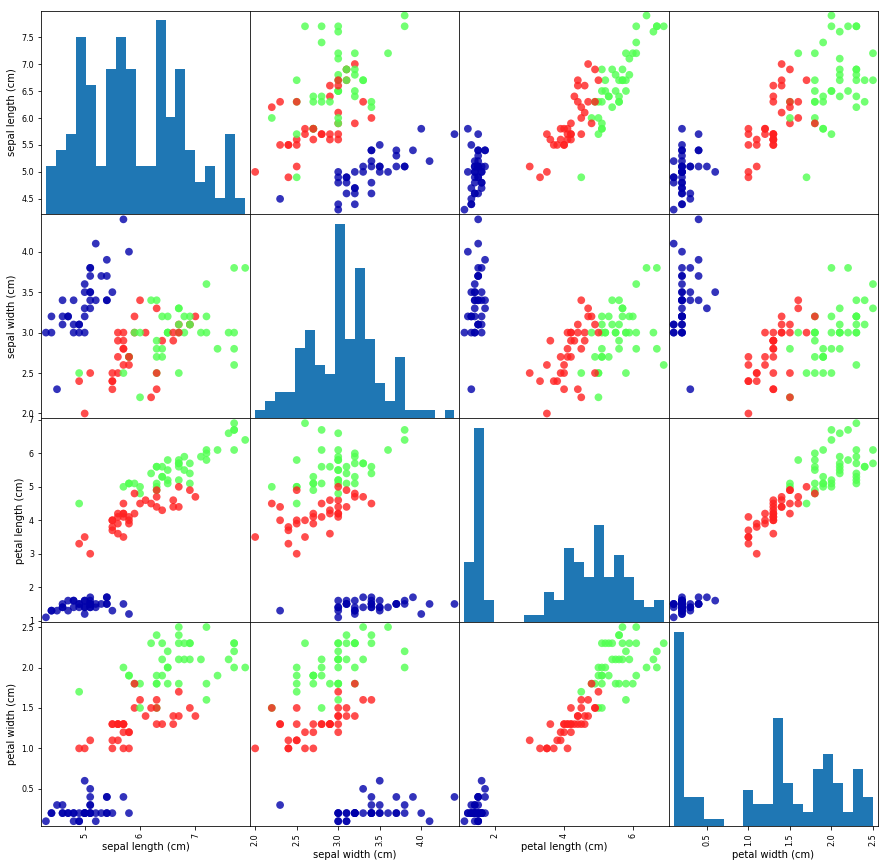

In [22]:
# x_train 데이터를 사용해서 데이터프레임을 만들고 
# y_train에 따라 색으로 구분된 산점도 행렬을 만든다.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

k-최근접 이웃 알고리즘

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# 가장 중요한 매개변수는 이웃의 개수

In [24]:
#fit 메서드 = knn 객체 자체를 반환 -> knn 객체 자체를 변경 시킴 = knn 객체가 문자열 형태로 출력
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
import numpy as np

In [26]:
X_new =np.array([5, 2.9, 1, 0.2])
X_new=X_new.reshape(1,-1)
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [27]:
prediction = knn.predict(X_new)
print("예측:", prediction)
print("예측한 타깃의 이름:", iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


In [28]:
# 모델 평가
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값: \n", y_pred)
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
# 97%의 품종을 정확히 맞춤

테스트 세트에 대한 예측값: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
테스트 세트의 정확도: 0.97


-----
# 2. 지도학습

In [29]:
# forge  = 인위적으로 만든 이진 분류 데이터셋
X, y = mglearn.datasets.make_forge()

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

X.shape: (26, 2)


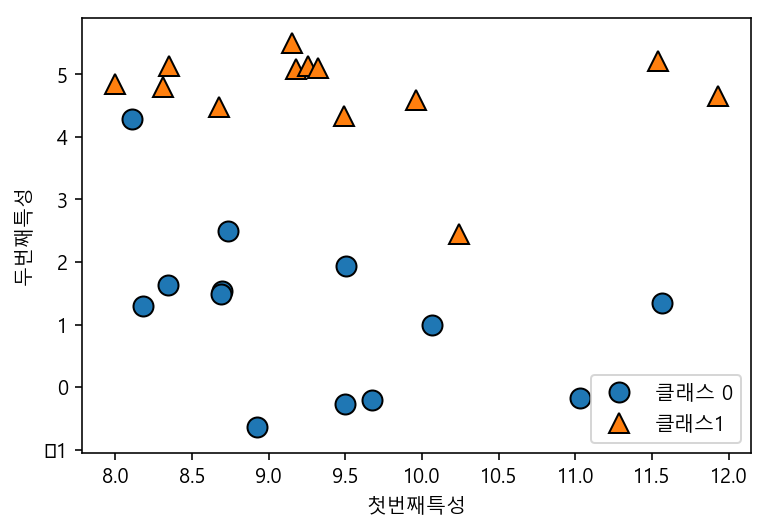

In [31]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["클래스 0","클래스1"],loc=4)
plt.xlabel("첫번째특성")
plt.ylabel("두번째특성")
print("X.shape:",X.shape)

Text(0,0.5,'타깃')

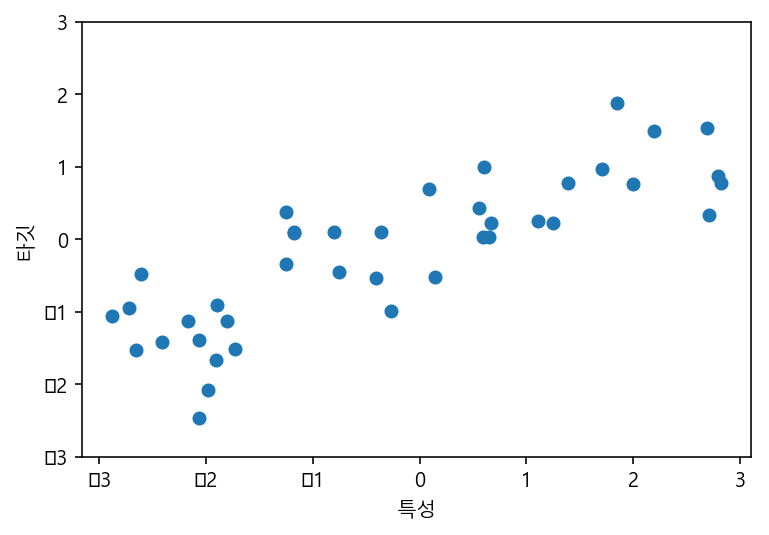

In [32]:
# wave는 입력 특성 하나와 모델링할 타깃 변수를 가짐
# 특성 : x축
# 회귀에 타깃 : y축
X,y =mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [33]:
# 유방암 종양의 임상 데이터 기록
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n",cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [34]:
print("유방암 데이터의 형태", cancer.data.shape)

유방암 데이터의 형태 (569, 30)


In [35]:
# 악성 (암 종양) 212개
# 양성 (해롭지 않는 종양) 357개
print("클래스별 샘플 개수:\n",
     {n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [36]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [37]:
# 회귀 분석용 실제 데이터셋 보스턴 주택가격 데이터 셋
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:",boston.data.shape)

데이터의 형태: (506, 13)


In [38]:
# 특성끼리 곱해서 의도적으로 확장
X,y =mglearn.datasets.load_extended_boston()
print("X.shape:",X.shape)

X.shape: (506, 104)


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


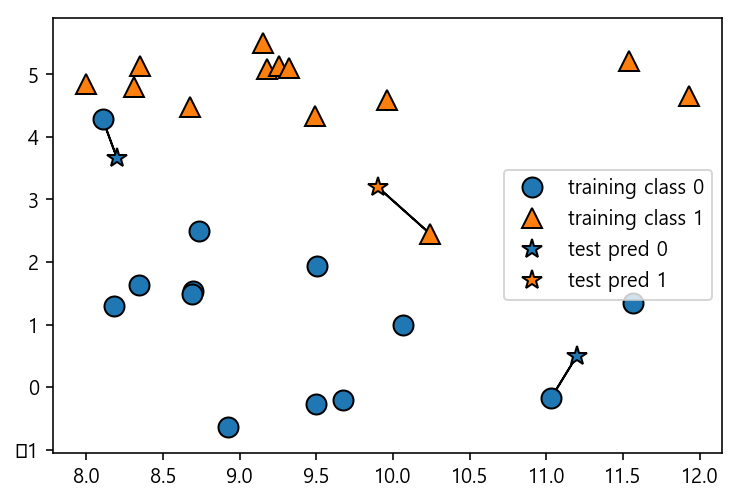

In [39]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


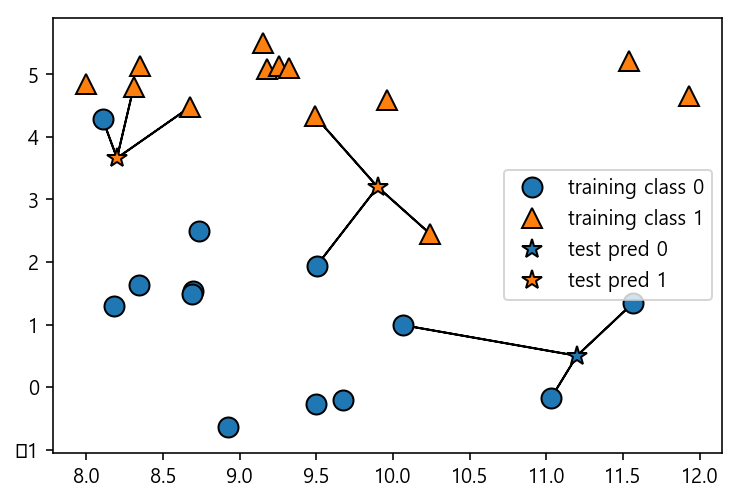

In [40]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [41]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
clf =KNeighborsClassifier(n_neighbors=3)

In [43]:
# 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [44]:
print("테스트 세트 예측:",clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [45]:
print("테스트 세트 정확도:{:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도:0.86


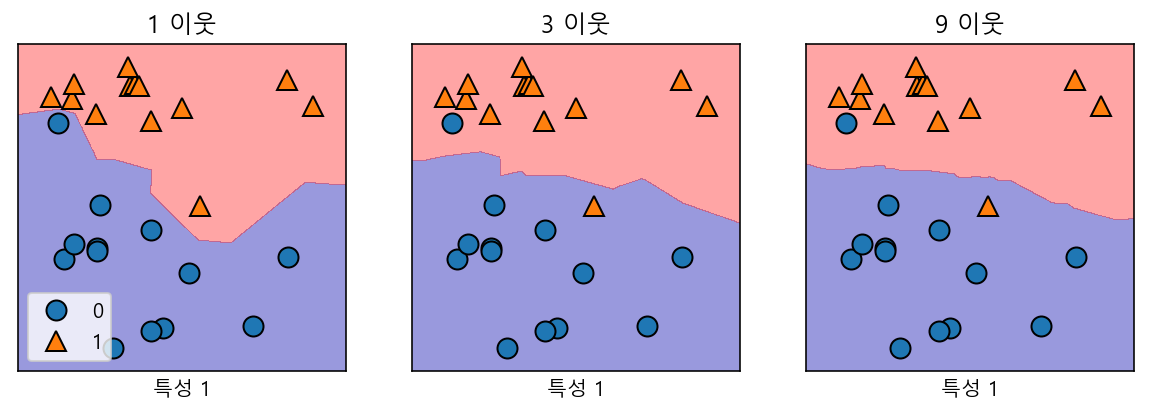

In [46]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

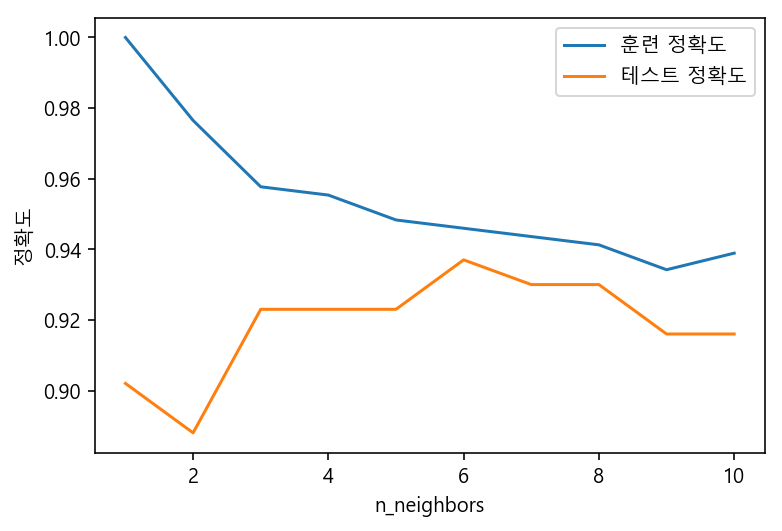

In [47]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]
# 1에서 10까지 n_neighbors 를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # 훈련세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

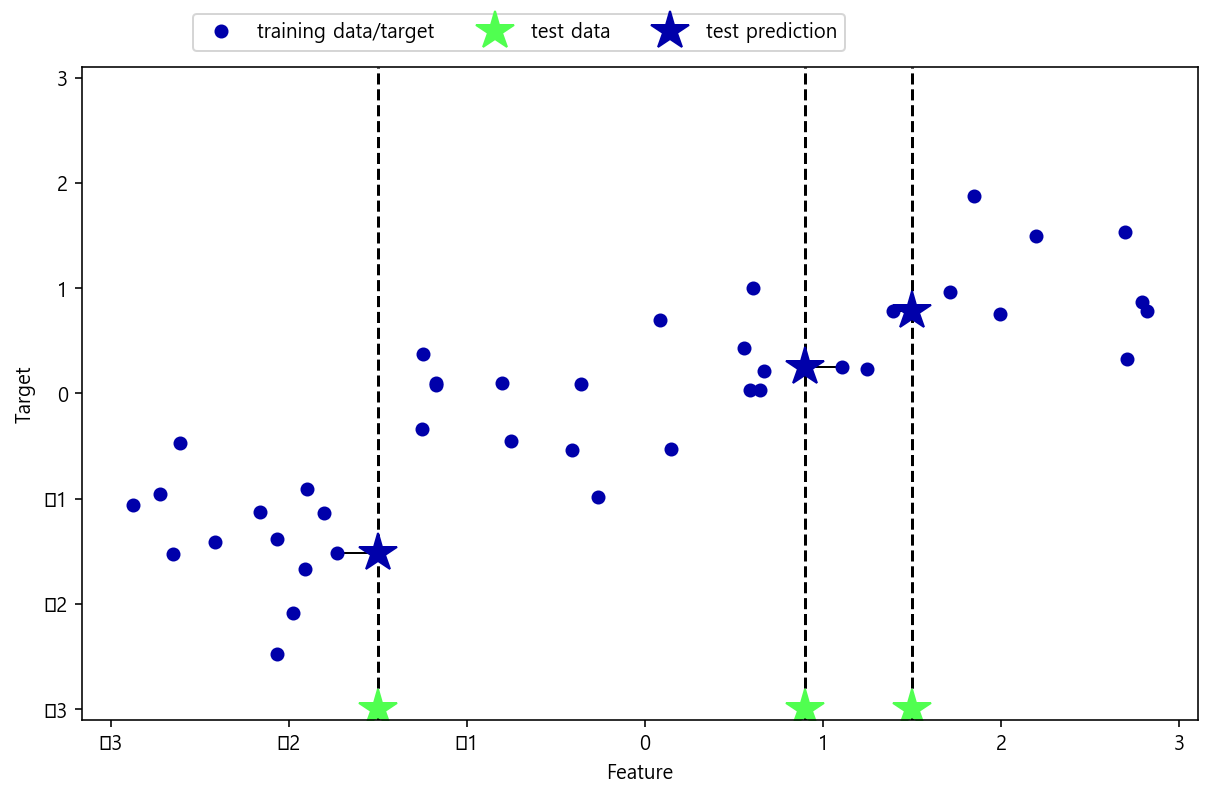

In [48]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

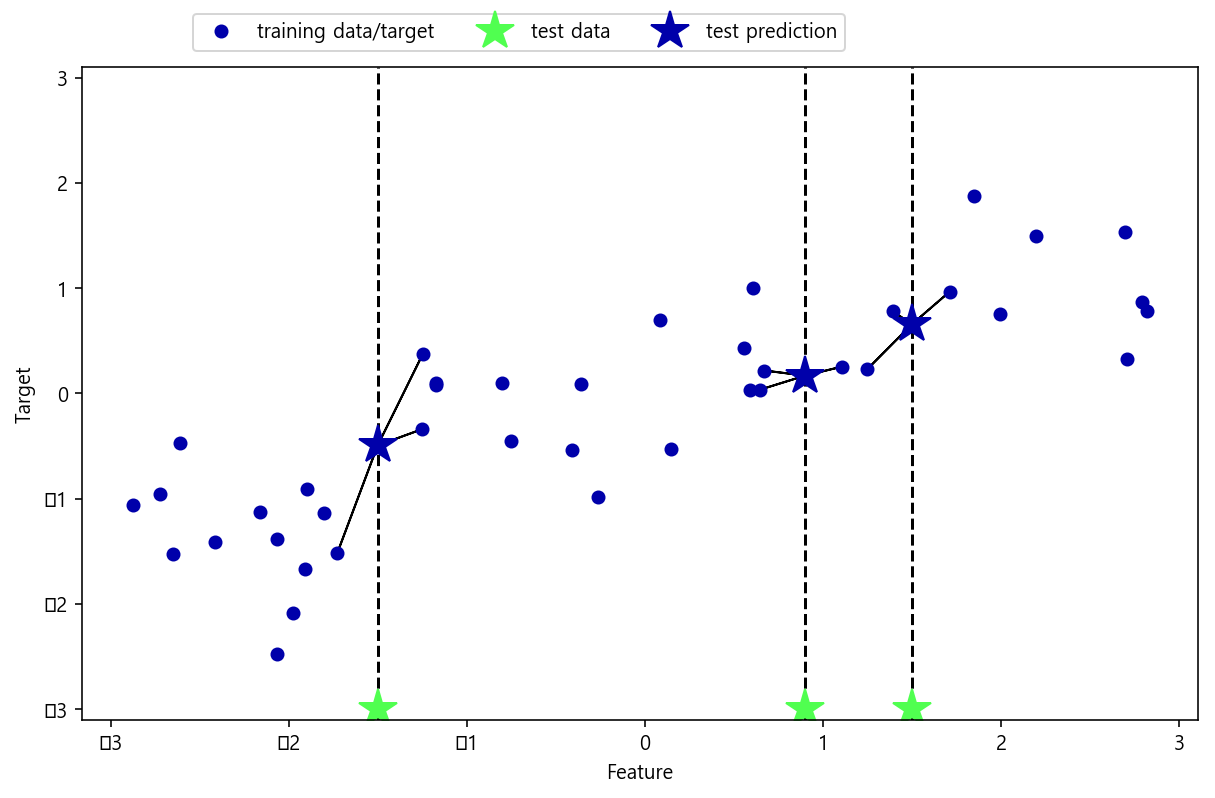

In [49]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [50]:
from sklearn.neighbors import KNeighborsRegressor

X,y =mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [51]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [52]:
print("테스트 세트 R^2: {:2f}".format(reg.score(X_test,y_test)))

테스트 세트 R^2: 0.834417


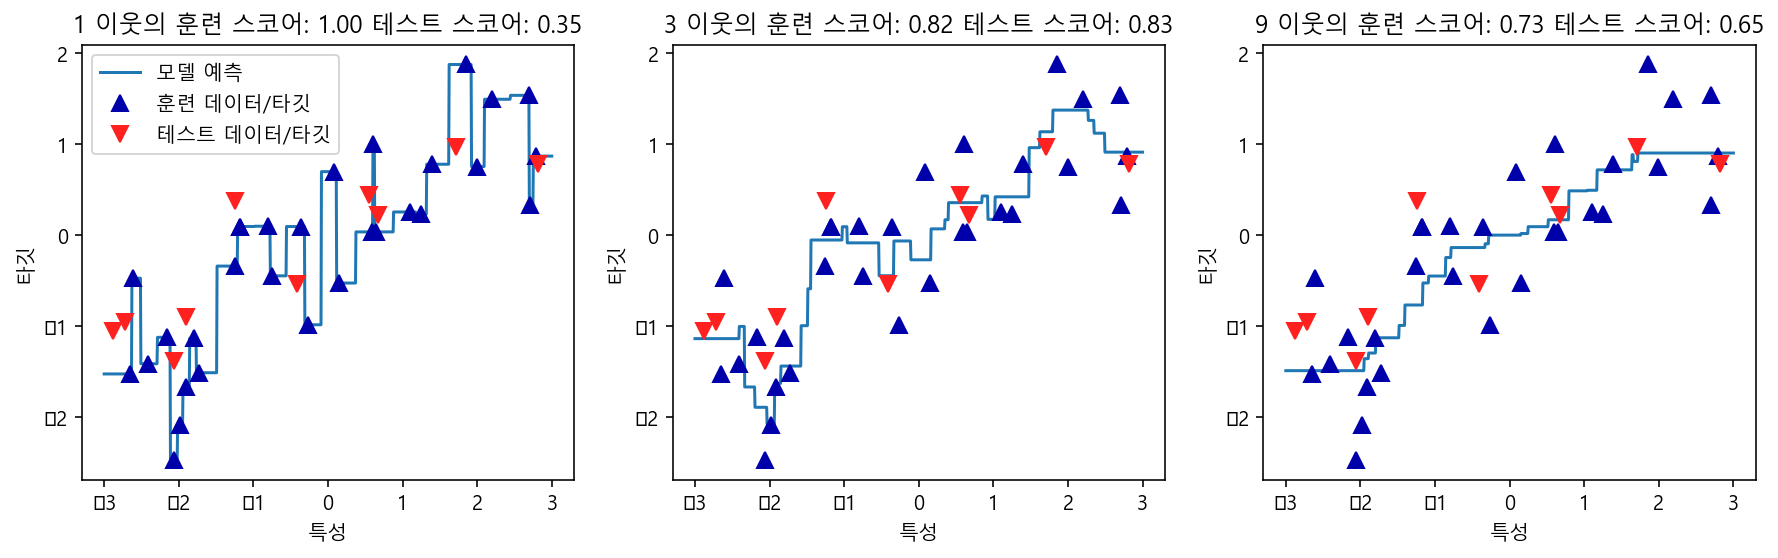

In [53]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")

axes[0].legend(["모델 예측", "훈련 데이터/타깃","테스트 데이터/타깃"], loc="best")
    

---
# 2.3 선형함수

In [54]:
import mglearn

w[0]: 0.393906  b: -0.031804


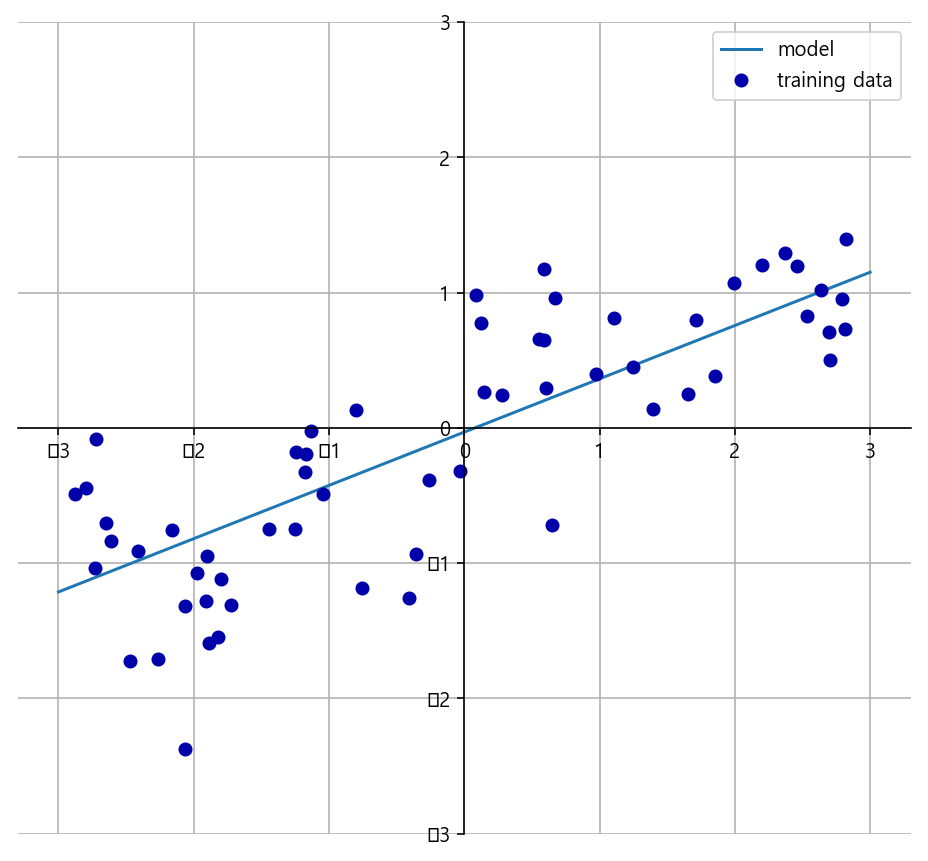

In [55]:
mglearn.plots.plot_linear_regression_wave()

In [56]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test ,y_train, y_test = train_test_split(X,y , random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [59]:
# 가중치
print("lr.coef_:",lr.coef_)
# 절편
print("lr.intercept_:",lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [60]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))


훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [62]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test ,y_train, y_test = train_test_split(X,y , random_state=0)

lr = LinearRegression().fit(X_train, y_train)

In [63]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [64]:
#리지 회귀
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [65]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [67]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


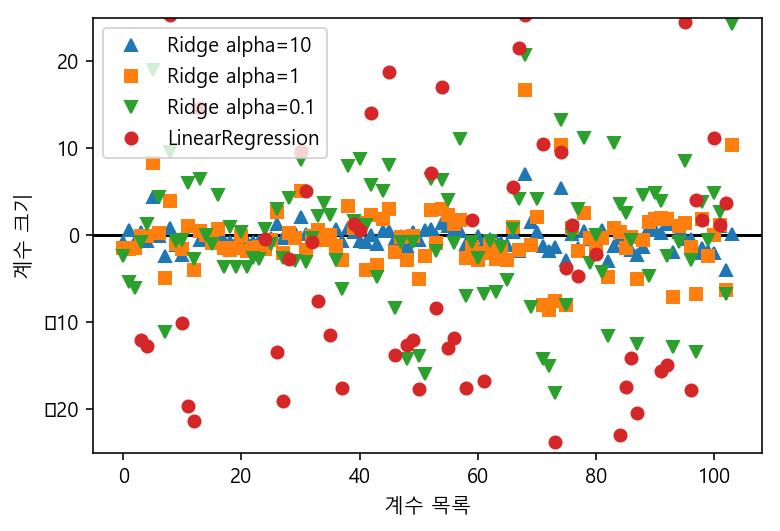

In [70]:
plt.plot(ridge10.coef_,'^', label="Ridge alpha=10")
plt.plot(ridge.coef_,'s', label="Ridge alpha=1")
plt.plot(ridge01.coef_,'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims= plt.xlim()
plt.hlines(0, xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()


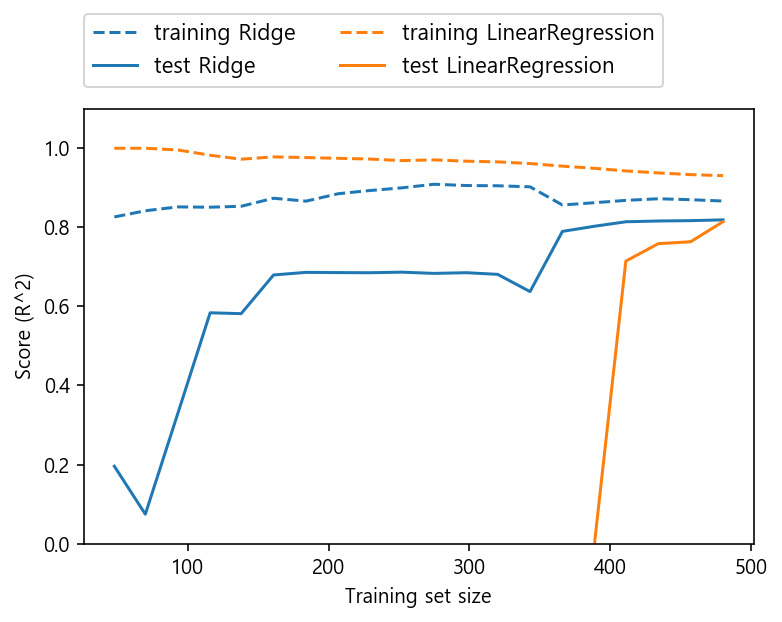

In [71]:
mglearn.plots.plot_ridge_n_samples()

In [73]:
#라소 
from sklearn.linear_model import Lasso

lasso =Lasso().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ !=0 ))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [75]:
lasso001 =Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ !=0 ))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [77]:
lasso00001 =Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ !=0 ))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 94


Text(0,0.5,'계수 크기')

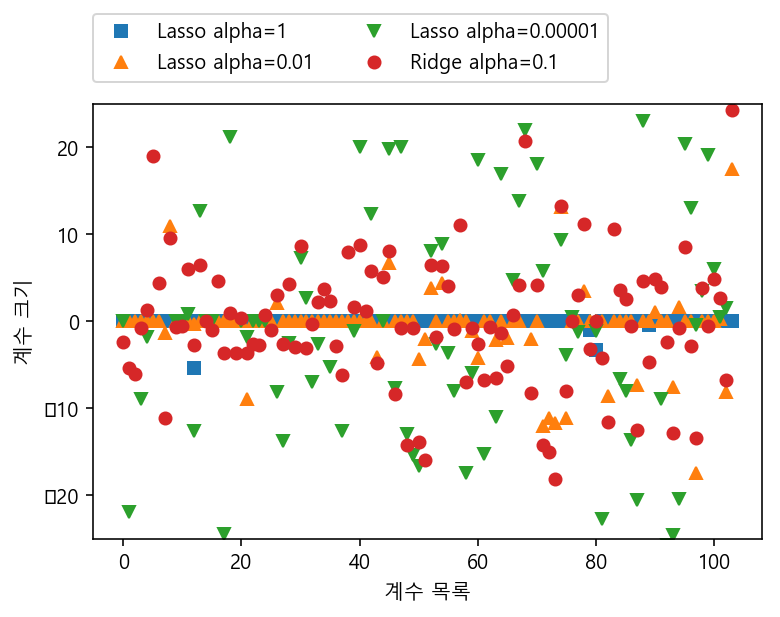

In [78]:
plt.plot(lasso.coef_,'s', label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v', label="Lasso alpha=0.00001")

plt.plot(ridge01.coef_,'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")


#lasso 는 0으로 만들기 때문에 정말 필요한 속성만 필요하다면 사용하는 것을 추천
#alpha 값의 차이

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


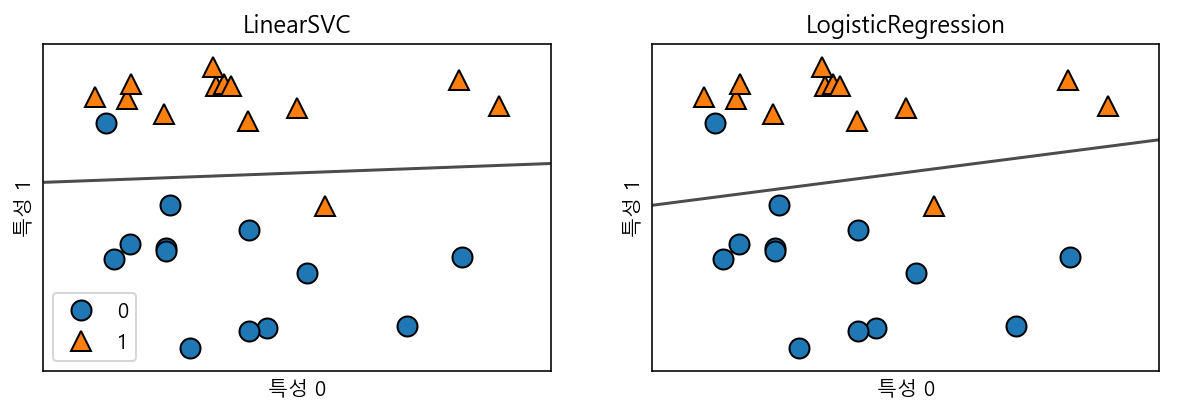

In [79]:
# 선형모델
# 로지스틱 회귀, 서포트 벡터 머신

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y= mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X , fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
    

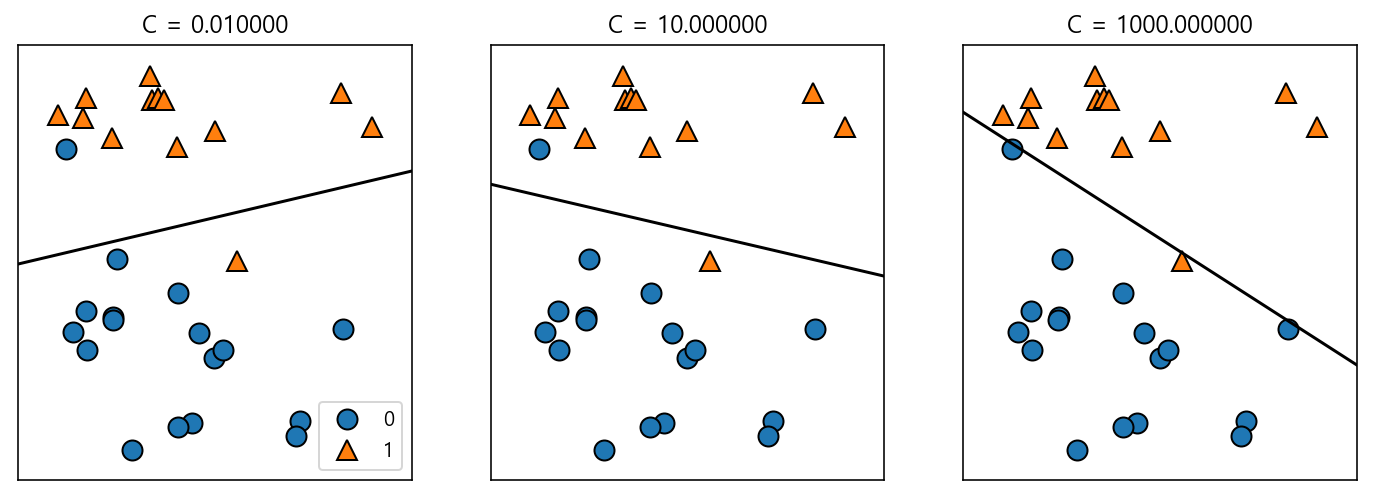

In [80]:
mglearn.plots.plot_linear_svc_regularization()

In [82]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
     cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test,y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


In [83]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


In [85]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


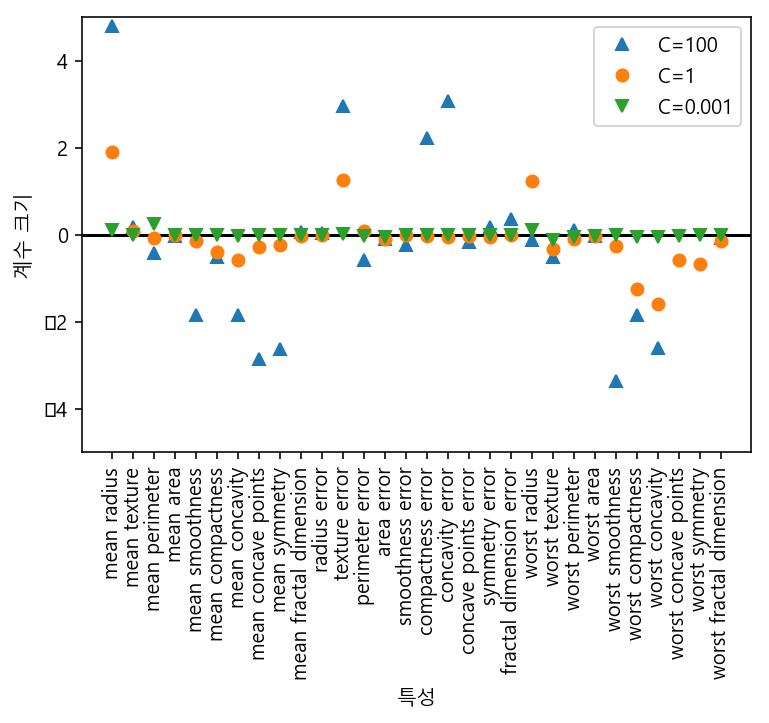

In [88]:
plt.plot(logreg100.coef_.T,'^', label="C=100")
plt.plot(logreg.coef_.T,'o', label="C=1")
plt.plot(logreg001.coef_.T,'v', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims =plt.xlim()
plt.hlines(0, xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.legend()



C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


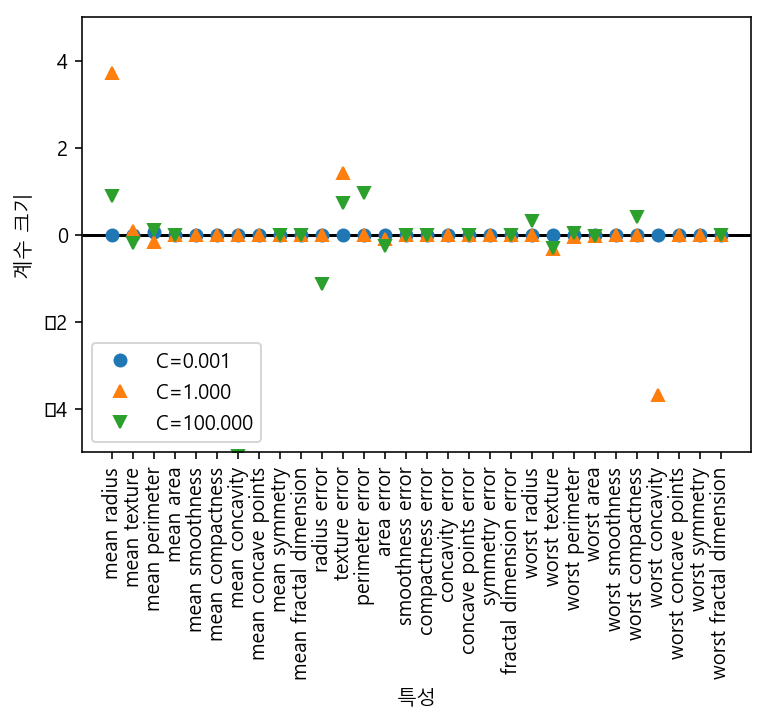

In [90]:
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C, penalty="l1").fit(X_train,y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)
    

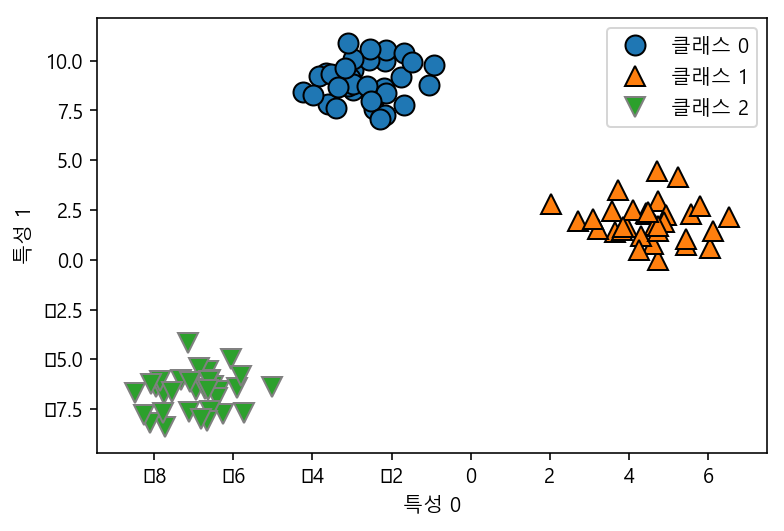

In [92]:
#다중클래스 분류용 선형 모델
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0","클래스 1","클래스 2"])


In [93]:
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)


계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


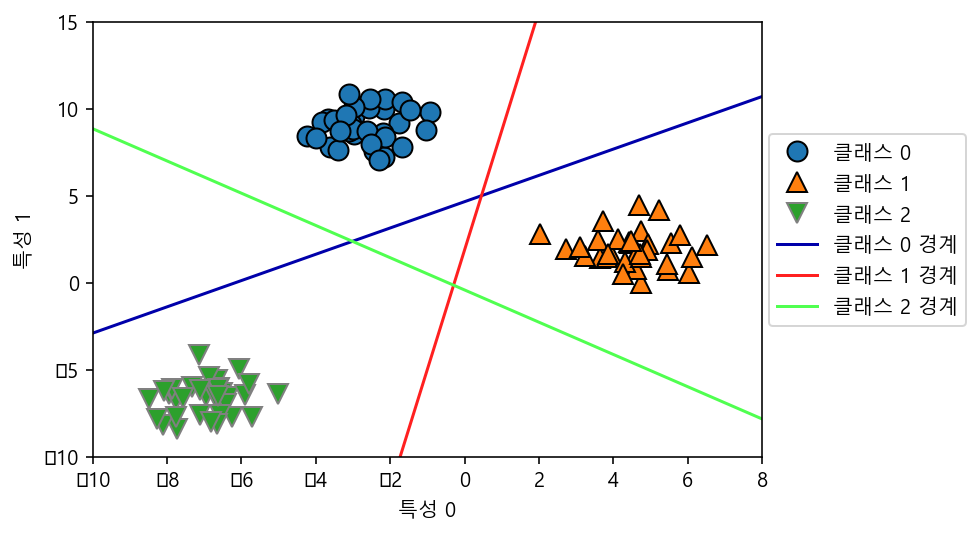

In [96]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line =np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0]+ intercept)/ coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")



Text(0,0.5,'특성 1')

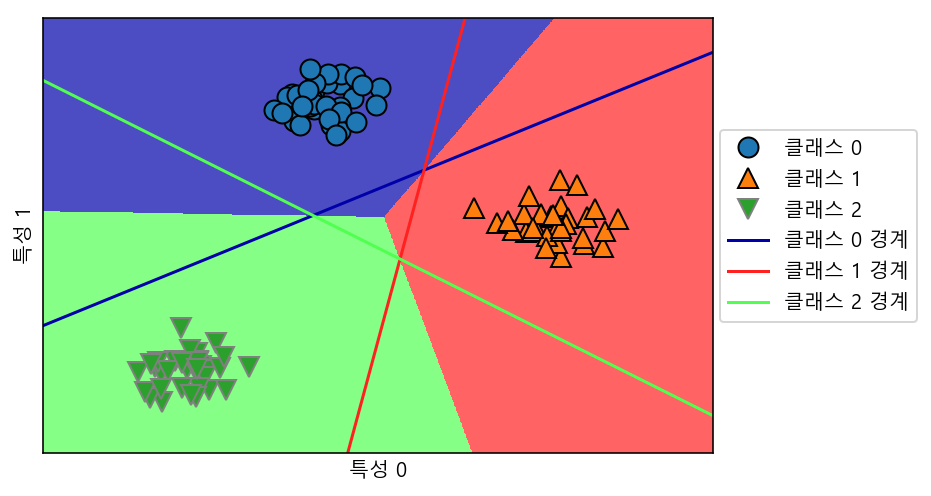

In [97]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line =np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0]+ intercept)/ coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'], loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")